# Haberman_exercise

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman=pd.read_csv('haberman.csv')

print(haberman.columns)

Index(['Age', 'Op_Year', 'axil_nodes_det', 'surv_status'], dtype='object')


In [9]:
print(haberman.shape)
haberman['surv_status'].value_counts()  #Determine the survival status of different people

(306, 4)


1    225
2     81
Name: surv_status, dtype: int64

In [29]:
haberman  #print loaded dataframe

,Age,Op_Year,axil_nodes_det,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


# Attributes of Haberman:

1) Number of Data points = 306             
2) class variable = 1( Surv_Status)          
3) Number of features= 3 (Age,Op_Year,axil_nodes_det)             

Objective considered here: To determine which factors(Age,Op_Year,axil_nodes_det) are influencing survival of cancer patients.


# Bivariate Analysis

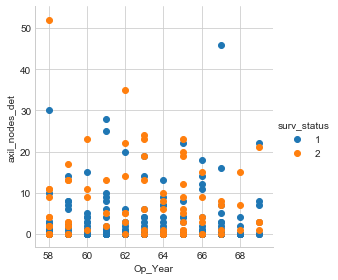

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "Op_Year", "axil_nodes_det") \
   .add_legend(); #tried to bring out the patients survival records
plt.show();                                             # but this is not giving clear results though

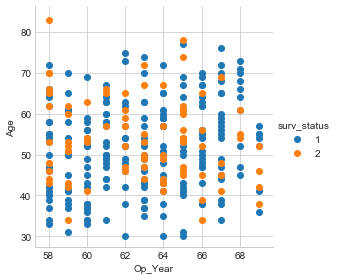

In [12]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "Op_Year", "Age")\
   .add_legend(); #tried to bring out the patients survival records
plt.show();# but this is not giving clear results though

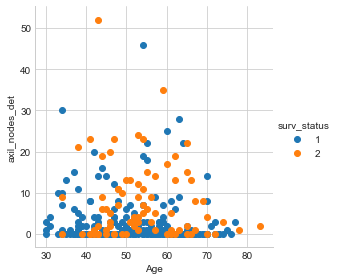

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="surv_status", size=4) \
   .map(plt.scatter, "Age", "axil_nodes_det")\
   .add_legend(); #tried to bring out the patients survival records
plt.show();# but this is not giving clear results though

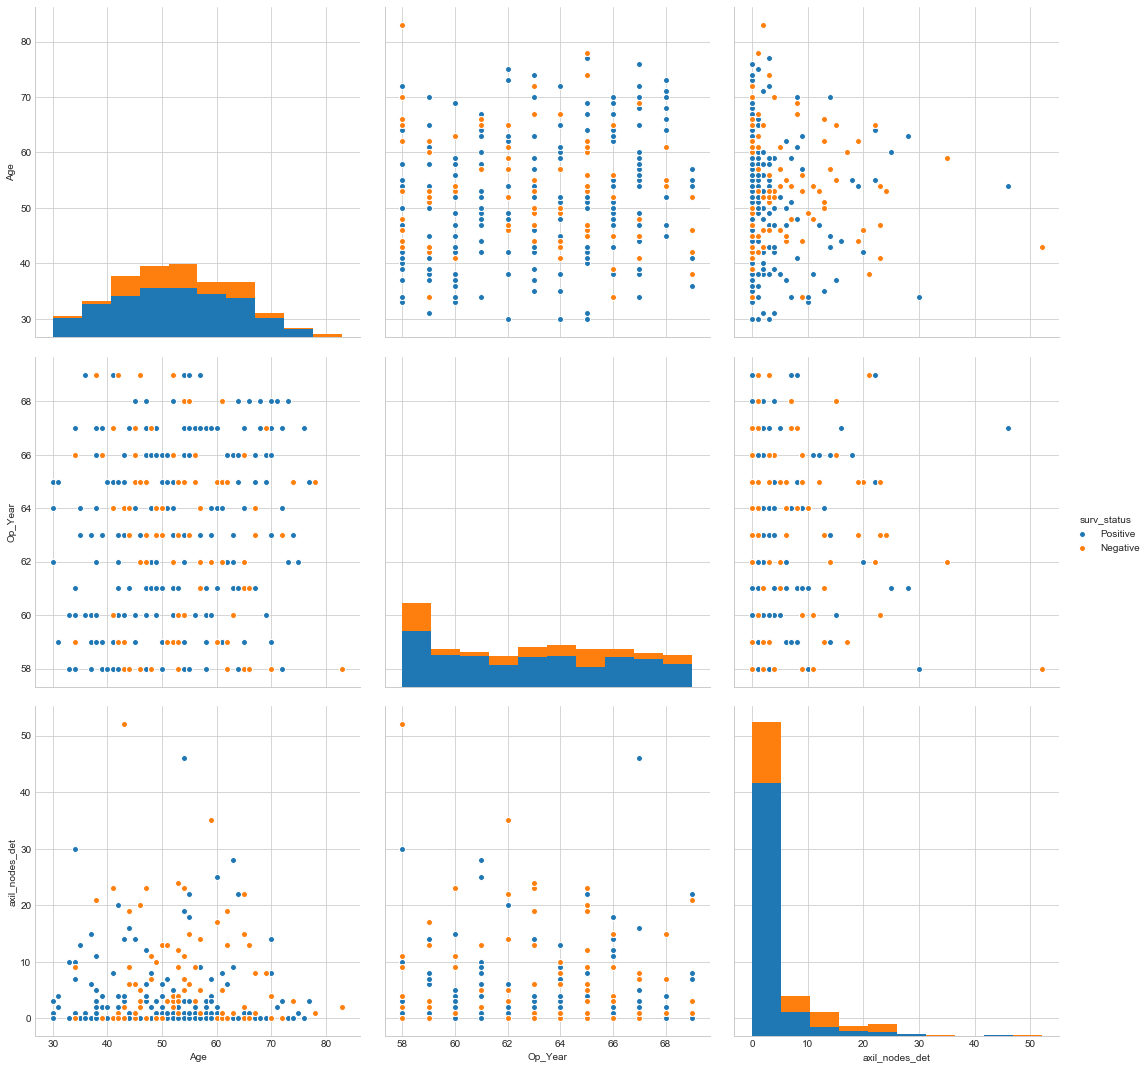

In [5]:
haberman["surv_status"] = haberman["surv_status"].apply(lambda x: "Positive" if x == 1 else "Negative")
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="surv_status", size=5)
plt.show()

Understanding:
 To determine the survival status, Age and axil_nodes counts are showing better information. We can say that:              
1) Most of the Patients whose age is <50 and >30 with axil_nodes<20 has more chances of surviving>= 5 years.           
2) Most of the Patients whose age is <60 and >50 with axil_nodes<10 has more chances of surviving>= 5 years and with increasing number of axil_nodes the survival is vulnerabale.           
3) The less the axil_nodes, the more are chances of survival for most of the ages of people.                    
4) There are some deviations from above findings where there can be many other factors influencing the life span. 

# Univariate Analysis

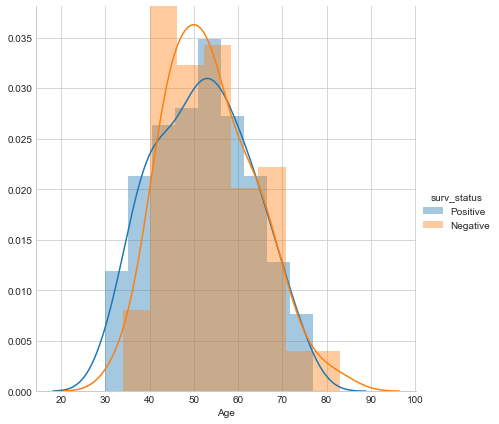

In [16]:
#Drawing PDF taking Age as an attribute
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(sns.distplot, "Age") \
   .add_legend();

plt.show();

Understanding:                                         
1) Number of people whose age >43(approx) and <61 has more chances of surviving >5 years is more                 
2) Number of people whose age >43(approx) and <61 has less chances of surviving <5 years is less.                 
And particulary few people around 50 years of age has very less chances of surviving <5 years.      

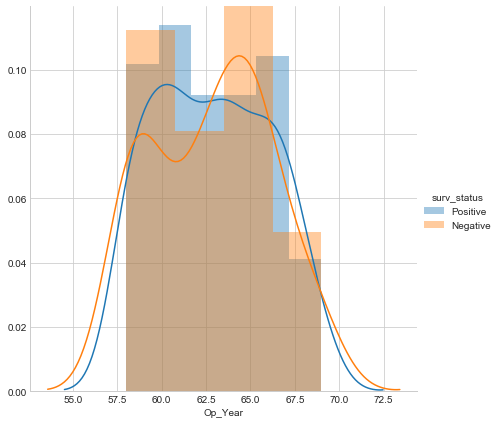

In [34]:
#Drawing PDF taking Year of operation as an attribute
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();

plt.show();

Understanding:                                                   
1) Many people on whom operations was done between years 1958 and 1966.5 had surivaval chances of more than 5 years         
2) There are significant number of people who had survival chances of less than 5 years when operated between 1963 and 1966.     This count is little fluctuating between years 1957 and 1963 where there are very less cases recorded of lesser survival chances

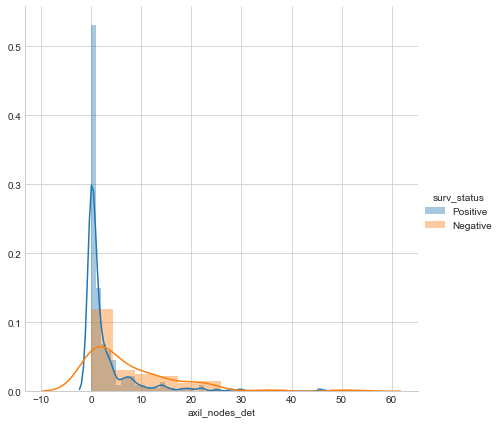

In [21]:
#Drawing PDF taking Year of operation as an attribute
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="surv_status", size=6) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();

plt.show();


Understanding:
  Patients with less number of axiliary nodes detected post surgery say <=10 showed a significant chances of survival period> 5 years

In [7]:
import numpy as np

#print(haberman)
haberman_surv_positive = haberman.loc[haberman["surv_status"] == 'Positive'];
haberman_surv_negative= haberman.loc[haberman["surv_status"] == 'Negative'];

print(haberman_surv_positive.describe())
print(haberman_surv_negative.describe())

              Age     Op_Year  axil_nodes_det
count  225.000000  225.000000      225.000000
mean    52.017778   62.862222        2.791111
std     11.012154    3.222915        5.870318
min     30.000000   58.000000        0.000000
25%     43.000000   60.000000        0.000000
50%     52.000000   63.000000        0.000000
75%     60.000000   66.000000        3.000000
max     77.000000   69.000000       46.000000
             Age    Op_Year  axil_nodes_det
count  81.000000  81.000000       81.000000
mean   53.679012  62.827160        7.456790
std    10.167137   3.342118        9.185654
min    34.000000  58.000000        0.000000
25%    46.000000  59.000000        1.000000
50%    53.000000  63.000000        4.000000
75%    61.000000  65.000000       11.000000
max    83.000000  69.000000       52.000000


pdf list of patients survived> 5 Yrs : [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
CDF list of patients survived> 5 Yrs : [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
pdf list of patients survived < 5 Yrs : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
CDF list of patients survived< 5 Yrs : [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


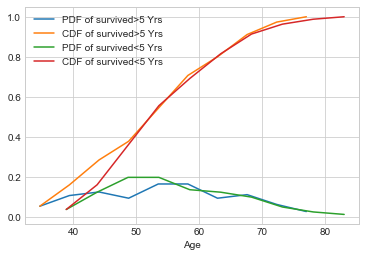

In [11]:
#drawing CDF for Age in case of survival above 5 years

counts, bin_edges = np.histogram(haberman_surv_positive['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
print("pdf list of patients survived> 5 Yrs :", pdf);
print(bin_edges)
#compute CDF for survived patients and plot them
cdf = np.cumsum(pdf)
print("CDF list of patients survived> 5 Yrs :", cdf);
plt.plot(bin_edges[1:],pdf,label='PDF of survived>5 Yrs')
plt.plot(bin_edges[1:], cdf,label='CDF of survived>5 Yrs')

#drawing CDF for Age in case of survival above 5 years
counts, bin_edges = np.histogram(haberman_surv_negative['Age'], bins=10,density = True)
pdf = counts/(sum(counts))
print("pdf list of patients survived < 5 Yrs :", pdf);
print(bin_edges)
#compute CDF for survived patients and plot them
cdf = np.cumsum(pdf)
print("CDF list of patients survived< 5 Yrs :", cdf);
plt.plot(bin_edges[1:],pdf,label='PDF of survived<5 Yrs')
plt.plot(bin_edges[1:], cdf,label='CDF of survived<5 Yrs')

plt.xlabel('Age')
plt.legend();

plt.show();

Understanding:                                                        
1) Survival> 5 years is significant for the patients below age 50 years                       
2) Survival < 5 years is notable from patients of age above 50 years                  

pdf list of patients survived> 5 Yrs : [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF list of patients survived> 5 Yrs : [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
pdf list of patients survived < 5 Yrs : [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF list of patients survived< 5 Yrs : [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


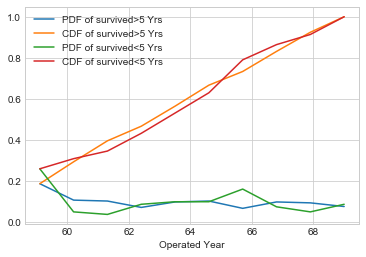

In [10]:
#drawing CDF for Operated Year in case of survival above 5 years

counts, bin_edges = np.histogram(haberman_surv_positive['Op_Year'], bins=10,density = True)
pdf = counts/(sum(counts))
print("pdf list of patients survived> 5 Yrs :", pdf);
print(bin_edges)
#compute CDF for survived patients and plot them
cdf = np.cumsum(pdf)
print("CDF list of patients survived> 5 Yrs :", cdf);
plt.plot(bin_edges[1:],pdf,label='PDF of survived>5 Yrs')
plt.plot(bin_edges[1:], cdf,label='CDF of survived>5 Yrs')\

#drawing CDF for Operated Year in case of survival above 5 years
counts, bin_edges = np.histogram(haberman_surv_negative['Op_Year'], bins=10,density = True)
pdf = counts/(sum(counts))
print("pdf list of patients survived < 5 Yrs :", pdf);
print(bin_edges)
#compute CDF for survived patients and plot them
cdf = np.cumsum(pdf)
print("CDF list of patients survived< 5 Yrs :", cdf);
plt.plot(bin_edges[1:],pdf,label='PDF of survived<5 Yrs')
plt.plot(bin_edges[1:], cdf,label='CDF of survived<5 Yrs')

plt.xlabel('Operated Year')
plt.legend();
plt.show();

Understanding:
Trends on the count of patients survived >5 years and <5 years are notably same

pdf list of patients survived> 5 Yrs : [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
CDF list of patients survived> 5 Yrs : [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
pdf list of patients survived < 5 Yrs : [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF list of patients survived< 5 Yrs : [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


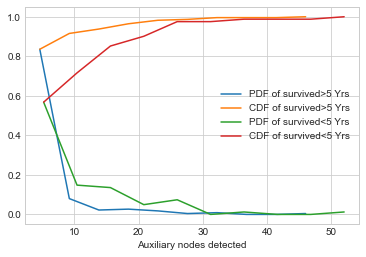

In [12]:
#drawing CDF for Auxiliary nodes detected in case of survival above 5 years

counts, bin_edges = np.histogram(haberman_surv_positive['axil_nodes_det'], bins=10,density = True)
pdf = counts/(sum(counts))
print("pdf list of patients survived> 5 Yrs :", pdf);
print(bin_edges)
#compute CDF for survived patients and plot them
cdf = np.cumsum(pdf)
print("CDF list of patients survived> 5 Yrs :", cdf);
plt.plot(bin_edges[1:],pdf,label='PDF of survived>5 Yrs')
plt.plot(bin_edges[1:], cdf,label='CDF of survived>5 Yrs')\

#drawing CDF for Auxiliary nodes detected in case of survival above 5 years
counts, bin_edges = np.histogram(haberman_surv_negative['axil_nodes_det'], bins=10,density = True)
pdf = counts/(sum(counts))
print("pdf list of patients survived < 5 Yrs :", pdf);
print(bin_edges)
#compute CDF for survived patients and plot them
cdf = np.cumsum(pdf)
print("CDF list of patients survived< 5 Yrs :", cdf);
plt.plot(bin_edges[1:],pdf,label='PDF of survived<5 Yrs')
plt.plot(bin_edges[1:], cdf,label='CDF of survived<5 Yrs')

plt.xlabel('Auxiliary nodes detected')
plt.legend();
plt.show();

Understanding:
More than 90% of patients who survived <5 years has auxiliarr nodes more than 25

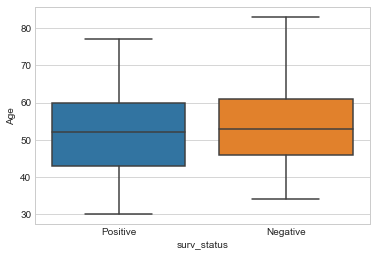

In [15]:
#Box Plots analysis to find the better observations on data

sns.boxplot(x='surv_status',y='Age', data=haberman)
plt.show()

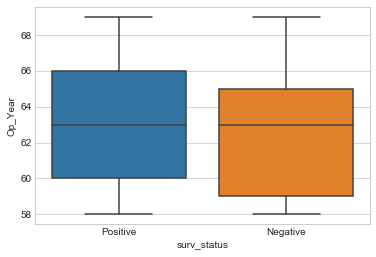

In [16]:
sns.boxplot(x='surv_status',y='Op_Year', data=haberman)
plt.show()

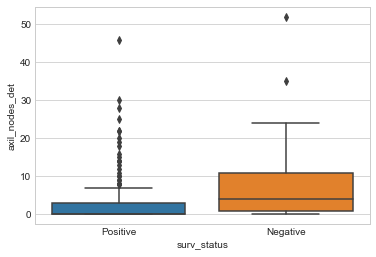

In [17]:
sns.boxplot(x='surv_status',y='axil_nodes_det', data=haberman)
plt.show()

Understanding from Box Plots:                                   
1) percentages of patients whose Survival > 5years is more seen between ages of 40 to 45 and percentages of patients whose Survival < 5years is more seen above the age of 60                      
2) percentages of patients whose Survival > 5years is more seen when operated in the years of 1965 and 1966 and percentages of patients whose Survival < 5years is more seen when operated in the years of 1959 and 1960              
3) almost more than 50% percent of patients has survived whose auxiliary nodes are less than 5 and most of the patients whose auriliary nodes are greater than 5 has less chancs of Survival < 5years                         


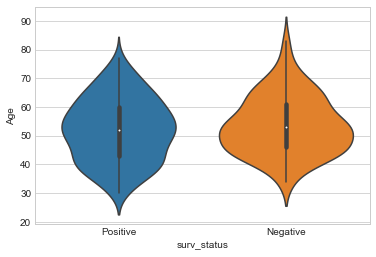

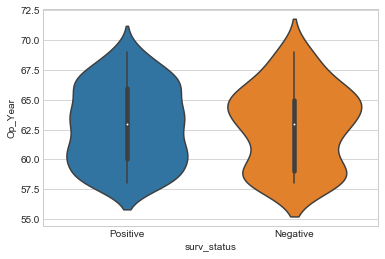

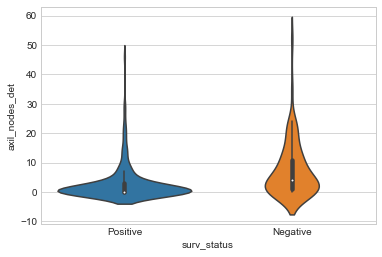

In [20]:
#Violin Plots to get much better observations:

sns.violinplot(x="surv_status", y="Age", data=haberman, size=8)
plt.show()

sns.violinplot(x="surv_status", y="Op_Year", data=haberman, size=8)
plt.show()

sns.violinplot(x="surv_status", y="axil_nodes_det", data=haberman, size=8)
plt.show()

Understanding:                                
1) More than 50% Survival status with > 5 years is notable for patients above age 50 years and Survival status with < 5 years is near to 50% ages 45 to 55                             
2) There is a static trend of patients whose Survival status with > 5 years when operated from years 1958 to 1967 and Survival status with < 5 years is increasing  in numbers when operated from years 1963 to 1965                       
3) 75% percent of patients has survived > 5 years has auxiliary nodes between -5 to 5                    

# Final Understanding

1) Patients who has auxiliary nodes less than 10 and ages less than 63 has good chances of surving > 5 years         
2) In exceptional cases patients who has more than 10 auxiliary nodes of different ages recorded of surviving > years         
3) Patients who has more than 20 auxiliary nodes irrespective of ages has very less chances of survival > 5 years